In [6]:
# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.append(r'C:\Users\mmazzolini\OneDrive - Scientific Network South Tyrol\Documents\conda\runoff_seasonal_forecast-master')

from sf_runoff import feature_sel, loyo_cv_lc, create_it_matrix, daily_climatology

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.metrics import mean_squared_error


import matplotlib.pyplot as plt

import os

import pdb

In [4]:
path=r'C:\Users\mmazzolini\OneDrive - Scientific Network South Tyrol\Documents\conda\daily_input\\'
# ## Feature selection
daily_input = pd.read_csv(path+'CANDOGLIA_TOCE_2000_2019.csv', index_col=0, parse_dates=True)

In [ ]:
daily_clim = daily_climatology(daily_input)
it_matrix = create_it_matrix(daily_input, 12)

In [13]:
X = it_matrix.drop(columns=['Q'])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=100)
results = pca.fit_transform(X_scaled)

In [46]:
import seaborn as sns

<AxesSubplot:>

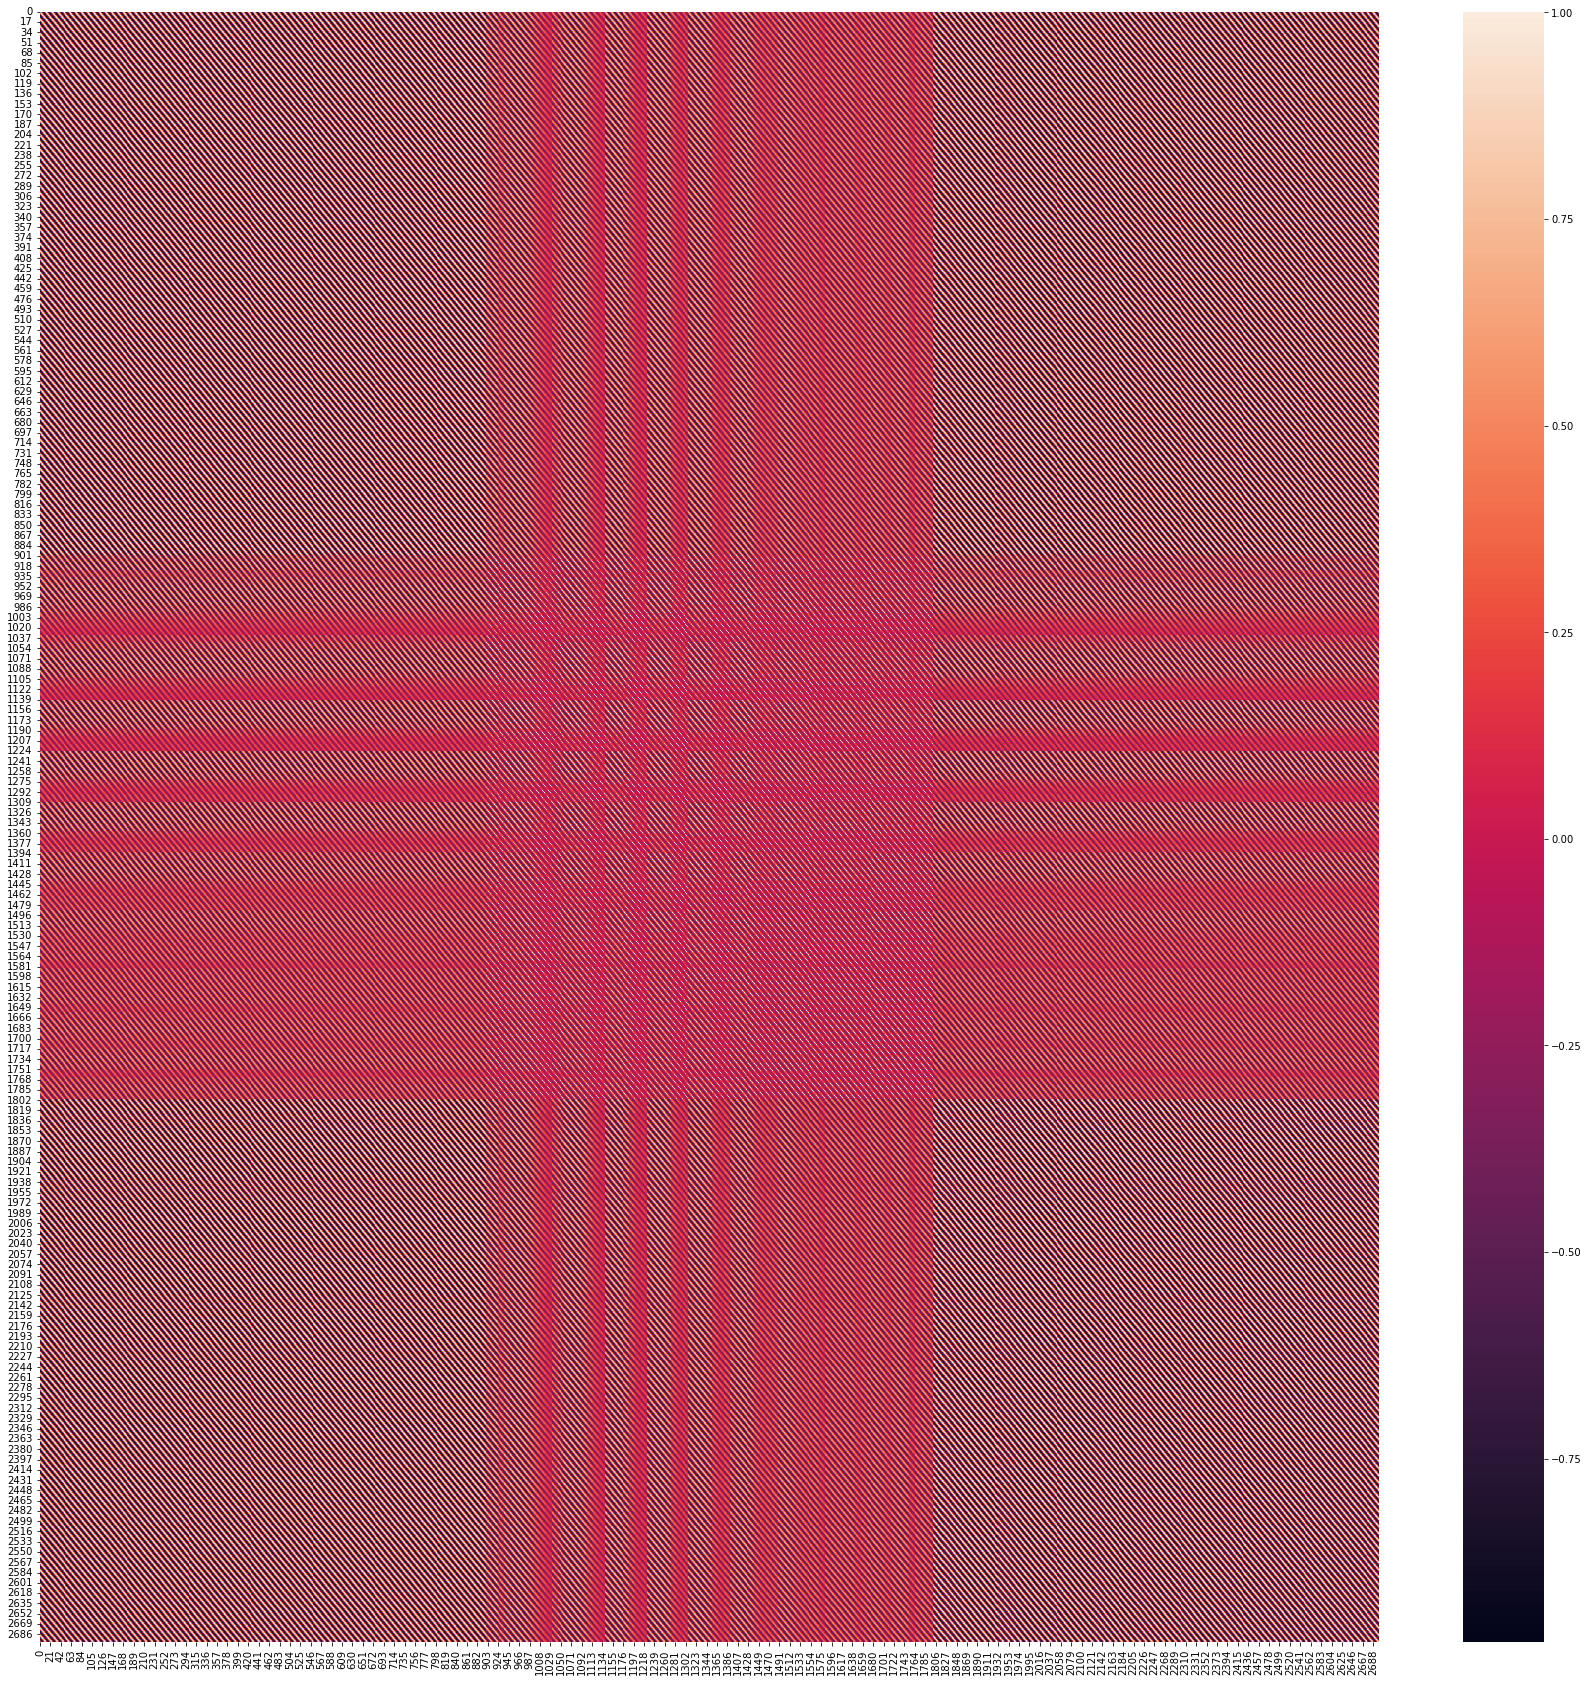

In [52]:
fig, ax = plt.subplots(figsize=(30,30))         # Sample figsize in inches
sns.heatmap(pca.get_covariance(),ax=ax,linewidths=0)

<AxesSubplot:>

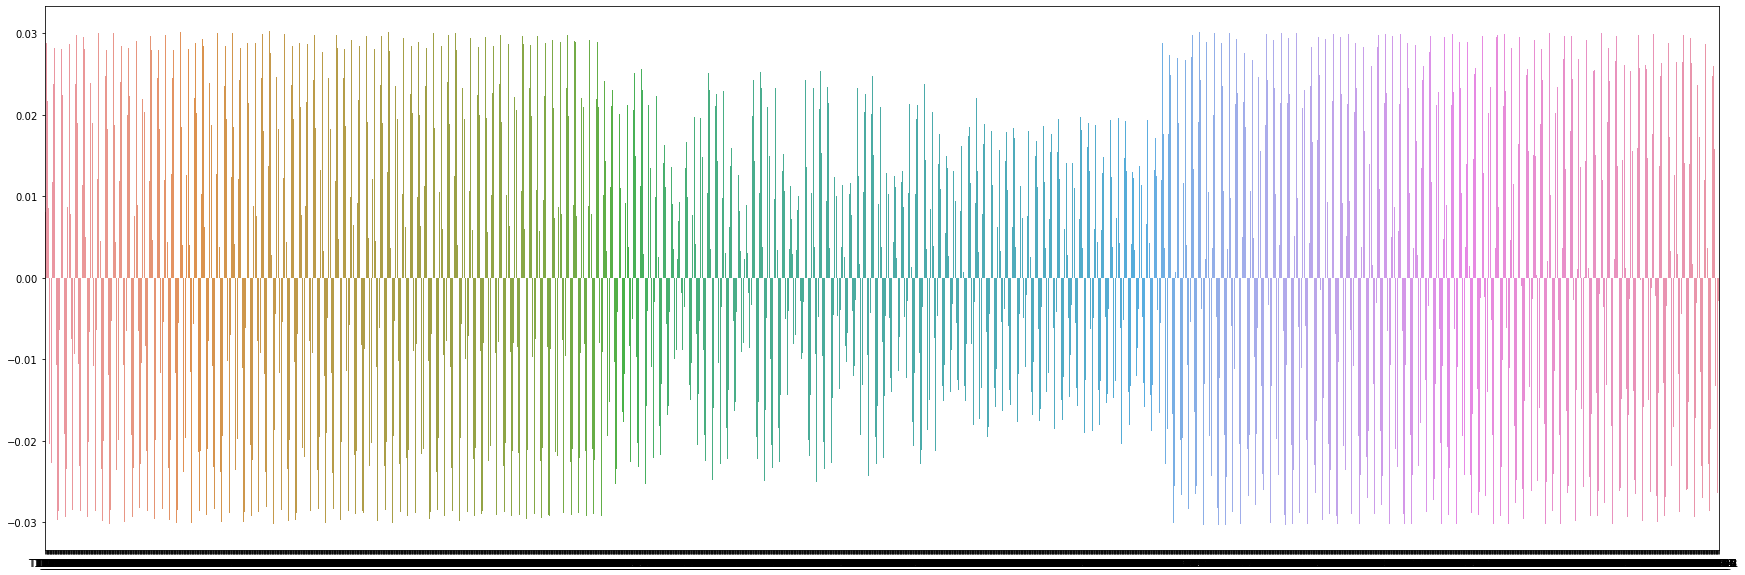

In [69]:
fig, ax = plt.subplots(figsize=(30,10))         # Sample figsize in inches
sns.barplot(y=pca.components_[0],x=X.columns,ax=ax)

In [67]:
X.columns

Index(['T1_-11', 'T1_-10', 'T1_-9', 'T1_-8', 'T1_-7', 'T1_-6', 'T1_-5',
       'T1_-4', 'T1_-3', 'T1_-2',
       ...
       'E141_-9', 'E141_-8', 'E141_-7', 'E141_-6', 'E141_-5', 'E141_-4',
       'E141_-3', 'E141_-2', 'E141_-1', 'E141_0'],
      dtype='object', length=2700)

In [41]:
results.shape

(6726, 100)